# openEO Client Demo

This notebook demonstrates how an openEO job execution can be managed from Python.

To run this notebook, an **openEO** early adopters account is necessary. Please obtain one via this link:
https://openeo.cloud/early-adopters/

In [1]:
import openeo

In [2]:
connection = openeo.connect('https://openeo.cloud').authenticate_oidc()

Authenticated using refresh token.


In [3]:
process_graph = {
    "1": {
      "arguments": {
        "bands": [
          "B04",
          "B02",
          "B03"
        ],
        "id": "SENTINEL2_L2A_SENTINELHUB",
        "spatial_extent": {
          "east": 84.30320684519523,
          "north": 28.28834175540571,
          "south": 28.268476701871247,
          "west": 84.25171700124623
        },
        "temporal_extent": [
          "2019-05-01T00:01:00Z",
          "2019-05-15T00:01:00Z"
        ]
      },
      "position": [
        0,
        0
      ],
      "process_id": "load_collection"
    },
    "2": {
      "arguments": {
        "data": {
          "from_node": "1"
        },
        "format": "GTIFF"
      },
      "position": [
        240,
        0
      ],
      "process_id": "save_result",
      "result": True
    }
}


In [4]:
job = connection.create_job(process_graph)

In [5]:
job.start_and_wait()

0:00:00 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': send 'start'
0:01:09 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:01:15 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:01:22 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:01:31 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:01:42 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:01:54 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:02:11 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:02:31 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': queued (progress N/A)
0:02:55 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': running (progress N/A)
0:03:26 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': running (progress N/A)
0:04:05 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': running (progress N/A)
0:04:52 Job 'vito-b852223e-cef6-4742-88b3-09a262efe440': r

<RESTJob job_id='vito-b852223e-cef6-4742-88b3-09a262efe440'>

In [6]:
job.describe_job()

{'created': '2022-04-05T11:57:10Z',
 'id': 'vito-b852223e-cef6-4742-88b3-09a262efe440',
 'process': {'process_graph': {'1': {'arguments': {'bands': ['B04',
      'B02',
      'B03'],
     'id': 'SENTINEL2_L2A_SENTINELHUB',
     'spatial_extent': {'east': 84.30320684519523,
      'north': 28.28834175540571,
      'south': 28.268476701871247,
      'west': 84.25171700124623},
     'temporal_extent': ['2019-05-01T00:01:00Z', '2019-05-15T00:01:00Z']},
    'position': [0, 0],
    'process_id': 'load_collection'},
   '2': {'arguments': {'data': {'from_node': '1'}, 'format': 'GTIFF'},
    'position': [240, 0],
    'process_id': 'save_result',
    'result': True}}},
 'status': 'finished',
 'updated': '2022-04-05T11:58:16Z',
 'usage': {'cpu': {'unit': 'cpu-seconds', 'value': 2475},
  'duration': {'unit': 'seconds', 'value': 213},
  'memory': {'unit': 'mb-seconds', 'value': 6675242}}}

In [7]:
job_results = job.get_results()

In [8]:
job_results.get_assets()

[<ResultAsset 'openEO_2019-05-01Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.vito.be/openeo/1.0/jobs/b852223e-cef6-4742-88b3-09a262efe440/results/ZmNlYmNiZDNhZTMxMjZjOTNkNTY3OWM4ZWEzNDg0MjcxMTA1YTM2MTU4MTBmNDAwMzY5MWI0Mjk5ZWU3N2U5YkBlZ2kuZXU%3D/619185bc5adf90f25960d545eb99a2cc/openEO_2019-05-01Z.tif?expires=1649764986'>,
 <ResultAsset 'openEO_2019-05-06Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.vito.be/openeo/1.0/jobs/b852223e-cef6-4742-88b3-09a262efe440/results/ZmNlYmNiZDNhZTMxMjZjOTNkNTY3OWM4ZWEzNDg0MjcxMTA1YTM2MTU4MTBmNDAwMzY5MWI0Mjk5ZWU3N2U5YkBlZ2kuZXU%3D/7bae35f54f40d9134448d4d9818bada4/openEO_2019-05-06Z.tif?expires=1649764986'>,
 <ResultAsset 'openEO_2019-05-11Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.vito.be/openeo/1.0/jobs/b852223e-cef6-4742-88b3-09a262efe440/results/ZmNlYmNiZDNhZTMxMjZjOTNkNTY3OWM4ZWEzNDg0MjcxMTA1YTM2MTU4MTBmNDAwMzY5MWI0Mjk5ZWU3N2U5YkBlZ2kuZXU%3D/e9c64b8c2a5323fd01b02000f145f62e/openEO_2019-05-1

In [9]:
downloaded_files = job_results.download_files("/home/jovyan/results")
downloaded_files

[PosixPath('/home/jovyan/results/openEO_2019-05-01Z.tif'),
 PosixPath('/home/jovyan/results/openEO_2019-05-06Z.tif'),
 PosixPath('/home/jovyan/results/openEO_2019-05-11Z.tif')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


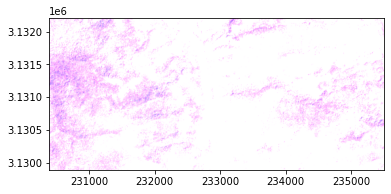

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


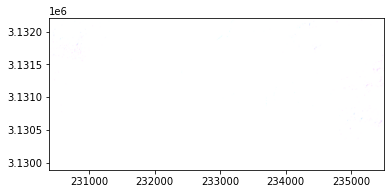

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


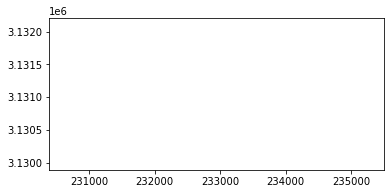

In [10]:
import rasterio
from rasterio.plot import show

for path in downloaded_files:
    img = rasterio.open(path)
    show(img)